<a href="https://colab.research.google.com/github/insomnia98/2021-LTspice-practice/blob/main/0629test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
name_file='test.csv'
#columns = ['Drain eCurrent(IdVg_Vd_300K_n31_des) Y', 'Drain eCurrent(IdVg_Vd_300K_n33_des) Y', 'Drain eCurrent(IdVg_Vd_300K_n34_des) Y']
pd.read_csv(name_file)

,Drain eCurrent(IdVg_Vd_300K_n31_des) Y,Drain eCurrent(IdVg_Vd_300K_n33_des) Y,Drain eCurrent(IdVg_Vd_300K_n34_des) Y
0,1.350000e-17,1.340000e-17,1.340000e-17
1,1.350000e-17,1.340000e-17,1.340000e-17
2,1.350000e-17,1.340000e-17,1.340000e-17
3,1.350000e-17,1.340000e-17,1.350000e-17
4,1.350000e-17,1.340000e-17,1.350000e-17
...,...,...,...
215,1.163735e-04,1.044977e-04,1.123666e-04
216,1.204173e-04,1.084209e-04,1.164596e-04
217,1.244873e-04,1.123724e-04,1.205768e-04
218,1.285821e-04,1.163513e-04,1.247171e-04


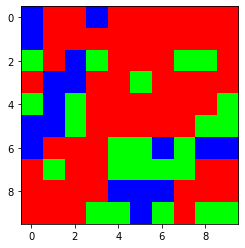

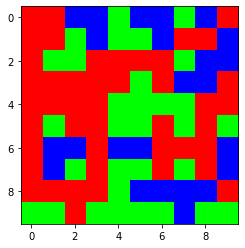

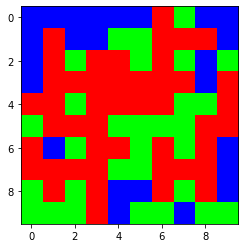

In [64]:
from PIL import Image
import matplotlib.pylab as plt

df=pd.DataFrame({"4":[0 for x in range(100) ],
                 "5":[0 for x in range(100) ],
                 "6":[0 for x in range(100) ]},
                 index=[x for x in range(100)])

a,b=66.5,66.5
img=[x for x in range(3)]
img_t=[x for x in range(3)]
img[0] = Image.open('/content/4_n31.png')
img[1]= Image.open('/content/5_n33.png')
img[2] = Image.open('/content/6_n34.png')
img_t[0] = Image.open('/content/4_n31.png')
img_t[1]= Image.open('/content/5_n33.png')
img_t[2] = Image.open('/content/6_n34.png')
#lstt=[]
for i in range(len(img)):
    img[i]=img[i].crop((116-a,(397/2)-b,116+a,(397/2)+b))
    img[i]=img[i].resize((10,10))
    img_t[i]=img[i]
    #plt.imshow(img[i])
    #plt.show()
    for j in range(0,img[i].size[0]):
        for k in range(0,img[i].size[1]):
            rgb = list(img[i].getpixel((j,k)))
            rgb_max = max(rgb)
            rgb_max_index = rgb.index(rgb_max)
            rgb[0],rgb[1],rgb[2]=0,0,0
            rgb[rgb_max_index]=255
            #rgb[rgb_max_index]=rgb_max  -> 축소로 인해 255가 아닌 193등의 값이 들어감
            img_t[i].putpixel((j,k),(rgb[0],rgb[1],rgb[2]))
            #lstt.append(rgb_max_index)
            df.loc[(j*10+k),str(i+4)]=rgb_max_index
    #print(lstt)
    #print(len(lstt))
    #lstt.clear()
    plt.imshow(img_t[i])
    plt.show()


In [60]:
df=df.transpose()
print(df)

   0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
4   2   2   1   0   1   2   2   0   0   0  ...   0   0   0   0   1   1   2   
5   0   0   0   0   0   0   0   0   0   1  ...   0   2   2   0   0   1   2   
6   2   2   2   2   0   1   0   0   1   1  ...   2   2   1   0   0   0   2   

   97  98  99  
4   0   0   1  
5   2   0   1  
6   2   2   1  

[3 rows x 100 columns]


In [61]:
df.to_csv('df.csv')

In [47]:
'''
for i in range(len(img)):
    
    t=5
    
    for j in range(0,img_t[i].size[0],5):
        for k in range(0,img_t[i].size[1]):
            a,b,c = img_t[i].getpixel((j,k))
            rgb[0]+=a
            rgb[1]+=b
            rgb[2]+=c
            if (j+1)%t==0 and (k+1)%t==0:
                rgb_max = max(rgb)
                rgb_max_index = rgb.index(rgb_max)
                rgb[0],rgb[1],rgb[2]=0,0,0
                rgb[rgb_max_index]=rgb_max
                lstt.append(int(rgb_max_index))
                #n.putpixel((i//t,j//t),(rgb[0],rgb[1],rgb[2]))
                 
                rgb[0],rgb[1],rgb[2]=0,0,0
    print(lstt)
    print(len(lstt))
    lstt.clear()
'''

[0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 